# Operator View

This notebook demonstrates how an **operator**...

> Note: To perform the actions in this notebook, the operator must be properly authenticated as a user with ...

In [1]:
import os
from dotenv import load_dotenv
import urllib3
from pathlib import Path

urllib3.disable_warnings()

root = Path.cwd()
while not (root / "eoepca-demo.env").exists():
    root = root.parent

load_dotenv(root / "eoepca-demo.env")

True

In [2]:
realm = os.getenv("REALM")
base_domain = os.getenv("BASE_DOMAIN")
keycloak_endpoint = os.getenv("KEYCLOAK_ENDPOINT")
default_scope = os.getenv("DEFAULT_SCOPE")

issuer = f"{keycloak_endpoint}/realms/{realm}"
token_endpoint = f"{issuer}/protocol/openid-connect/token"
device_authorization_endpoint = f"{issuer}/protocol/openid-connect/auth/device"
userinfo_endpoint = f"{issuer}/protocol/openid-connect/userinfo"

In [3]:
# Helper function to take screenshot using playwright
from playwright.async_api import async_playwright
from IPython.display import Image, display


async def snap_with_bearer_full(
    url: str, access_token: str, widen=True, fix_scroll=False
):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        ctx = await browser.new_context(
            extra_http_headers={"Authorization": f"Bearer {access_token}"},
            viewport={"width": 1920, "height": 1080} if widen else None,
            device_scale_factor=2,  # crisp
        )
        page = await ctx.new_page()
        await page.goto(url, wait_until="networkidle")

        if fix_scroll:
            await page.add_style_tag(
                content="""
                html, body { height: auto !important; }
                [style*="overflow"], .scroll, .scrollable, .overflow-auto, .overflow-y-auto {
                    overflow: visible !important; max-height: none !important; height: auto !important;
                }
            """
            )

        img = await page.screenshot(full_page=True)  # entire page height
        await browser.close()
        display(Image(data=img))

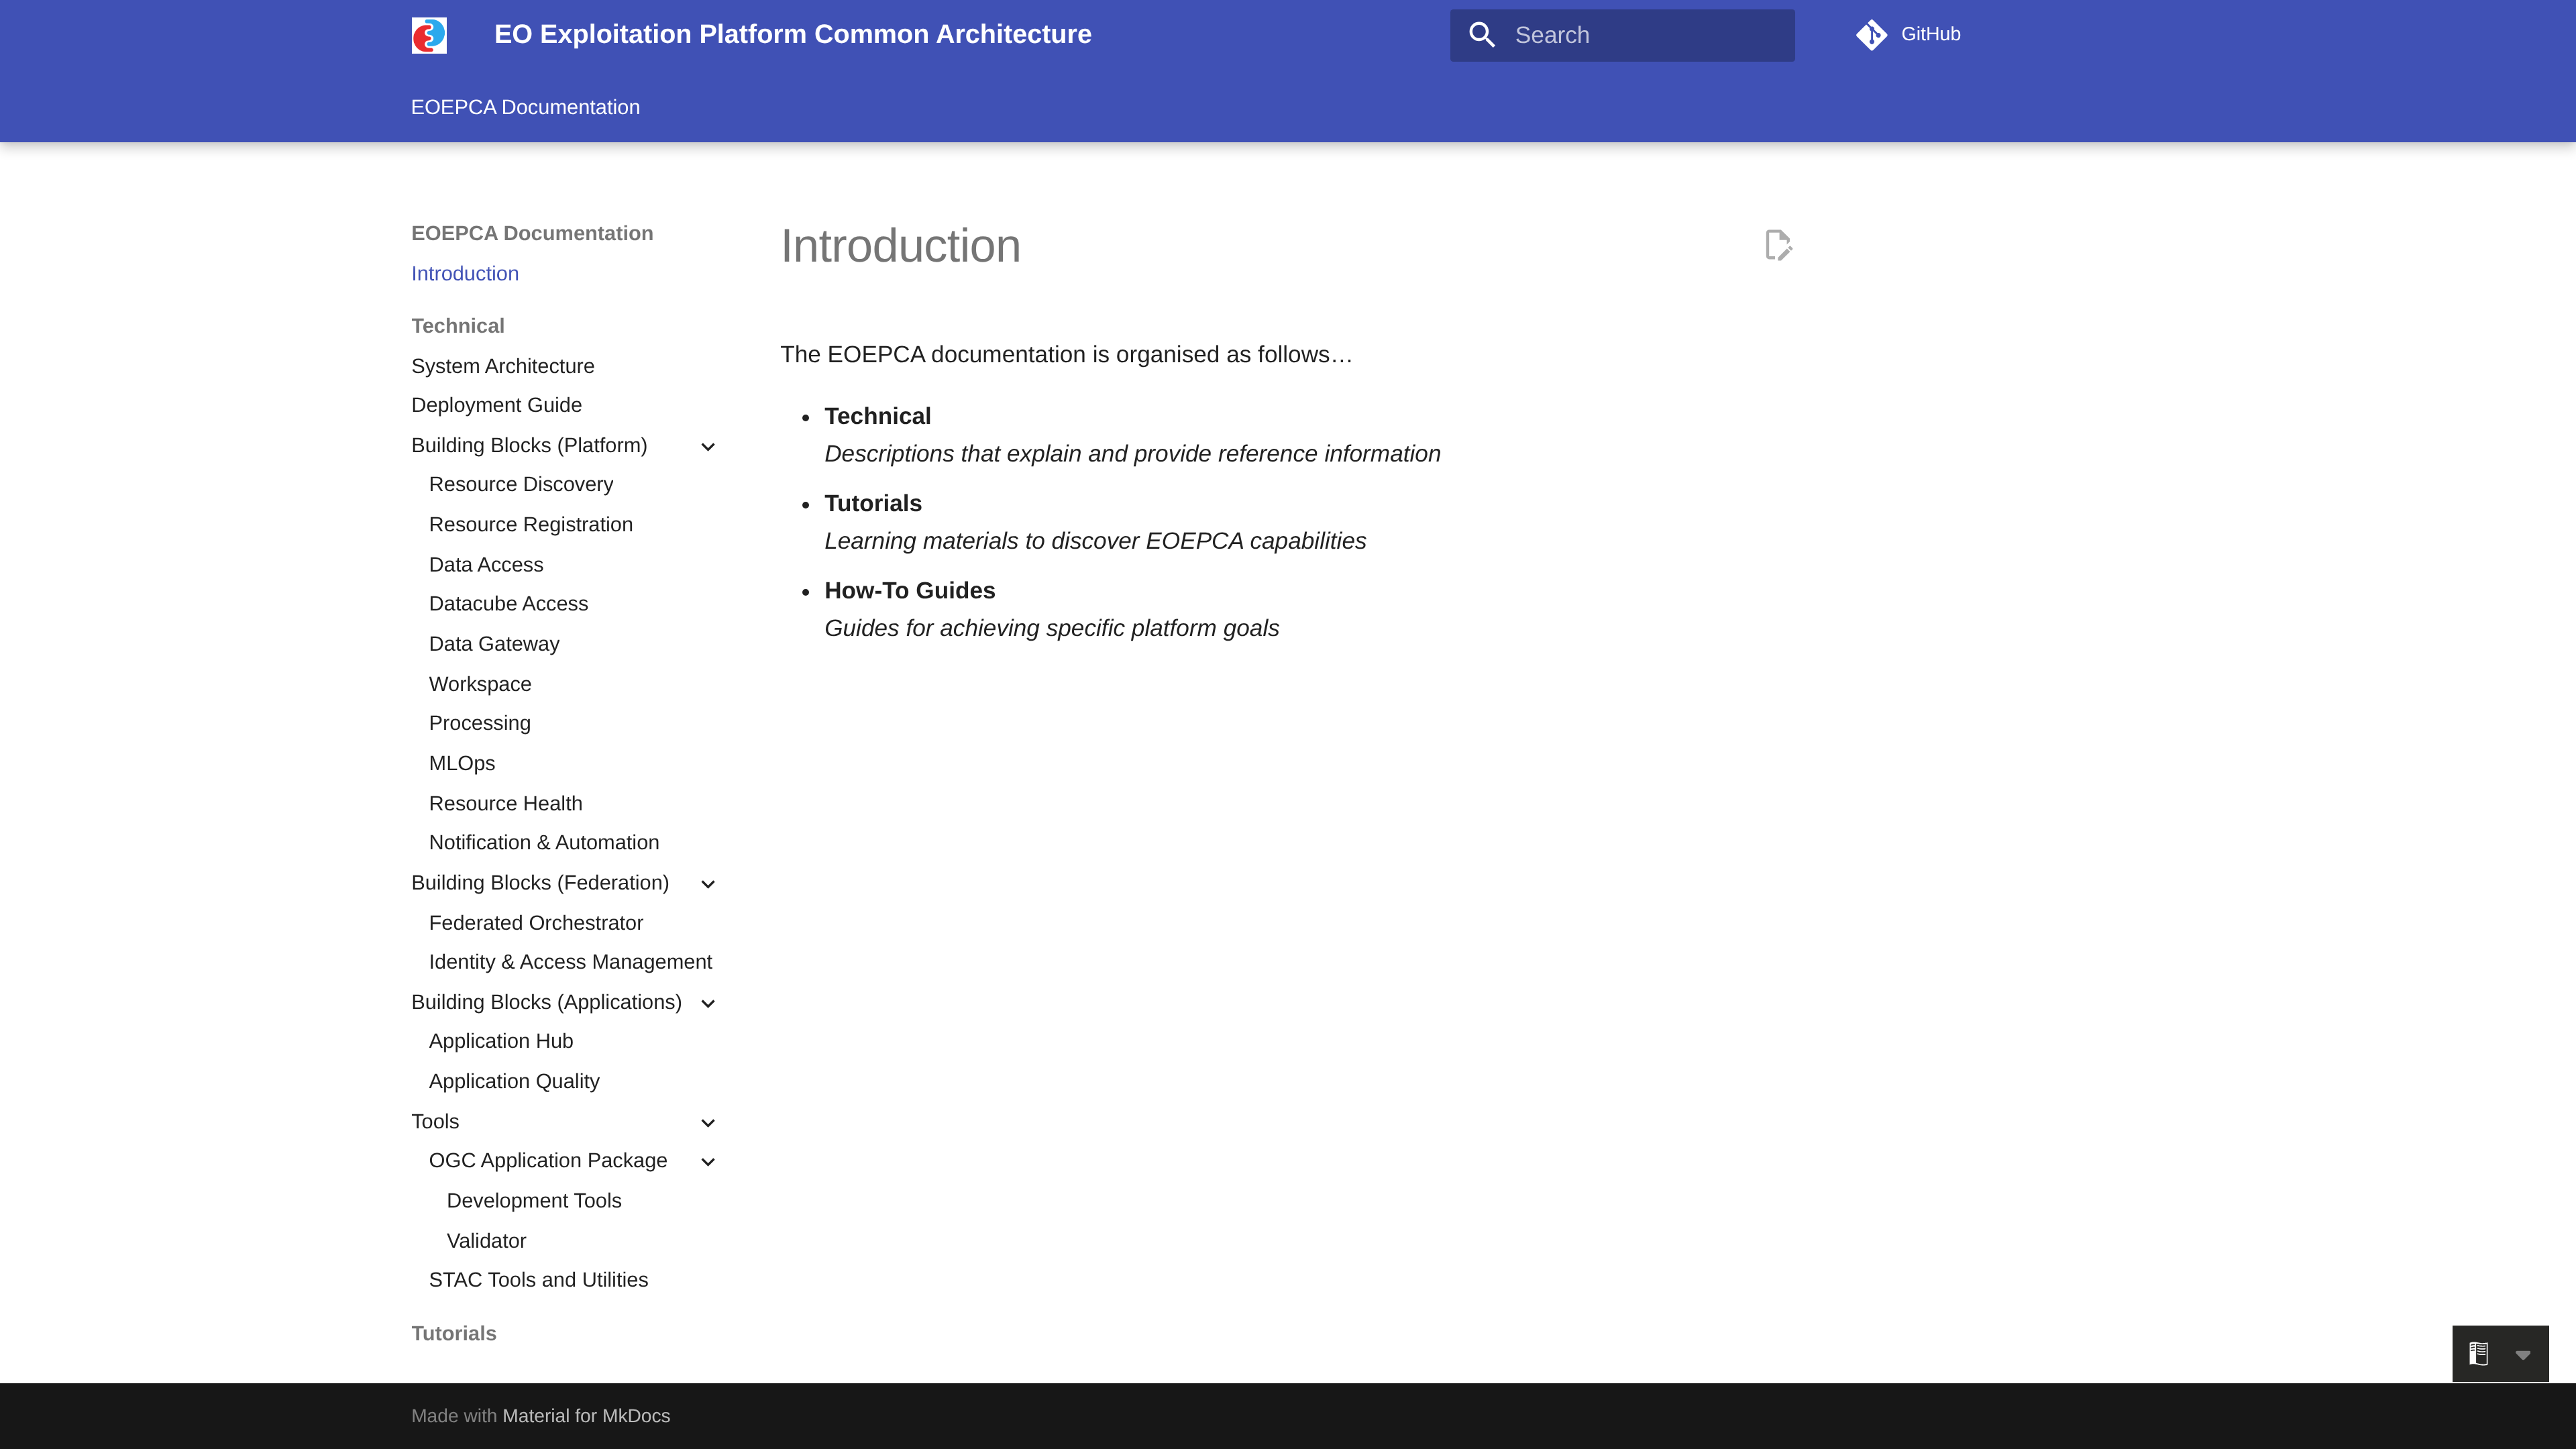

In [4]:
# TODO
await snap_with_bearer_full("https://eoepca.readthedocs.io/", "")